In [1]:
#Name: Harsimar Mangat
#Student ID: 21231935


from __future__ import print_function, division

import scipy.stats


%matplotlib inline

import numpy as np
import populations
import density
import nsfg
import first
import analytic
import hinc
import hinc2
import brfss
import thinkstats2
import thinkplot

#Exercise 5.1
mu = 178
sigma = 7.7
#Using scipy.stats.norm.cdf
#create variable x using the statistical function scipy.stats, the loc is the mean/mu and the scale/std deviation and sigma
#To shift and scale the distribution, we would use the 'loc' and 'scale' parameters
#Per page 57 of our text, they quote that the distribution of adult weights is apporximatley lognormal. 
x = scipy.stats.norm(loc=mu, scale=sigma)
#apply the cdf method.
low = x.cdf(177.8)    # lower Bound 5'10"
high = x.cdf(185.4)   # Higher Bound 6'1"
d=(high-low)*100
print("The % of the US population that is in this range is",d)

The % of the US population that is in this range is 34.20946829459531


1.009276922819508

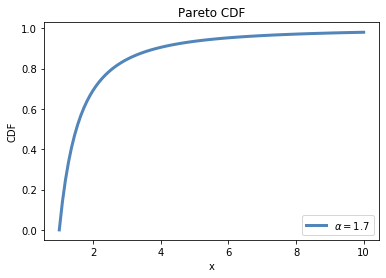

In [2]:
#Exercise 5.2


#Pareto distribution uses two parameters, alpha and xmin. Min is the minimum possile value & alpha (slope/shape parameter)
alpha = 1.7
xmin = 1       
population = scipy.stats.pareto(b=alpha, scale=xmin)

thinkplot.PrePlot(1)
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')


#What is the mean Human Height?
population.mean()
#2.4m
#What is the fraction of the population that is shorter than the mean?
population.cdf(population.mean())
#77.87% of the population 
#If there are 7 billion people in pareteo world, how many do we expect to be taller than 1KM?
population.sf(1000) * 7000000000
#We expect 55,602 people to be taller than 1 KM
#How tall do we expect the tallest person to be?
population.sf(615000)* 7e9
#Using .SF, we identify a value that could be constituted as the largest individual. In the previous example
# We calculated how many people we expected to be taller than 1KM. So, this we expect 1 person to be taller than 615,000




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Percentage of population below the mean salary is  66.0005879566872 %


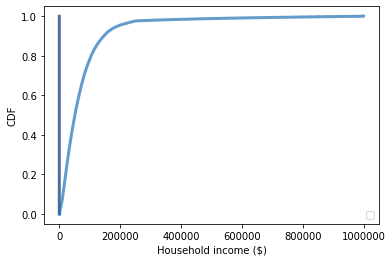

In [3]:
#Exercise 6.1

def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

def Mean(xs):
    return RawMoment(xs, 1)

def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)
    
def Var(xs):
    return CentralMoment(xs, 2)

def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

def Skewness(xs):
    return StandardizedMoment(xs, 3)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp





income_df = hinc.ReadData()
log_sample = InterpolateSample(income_df, log_upper=6.0)
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

sample = np.power(10, log_sample)
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

#Compute the median, mean, skewness and Pearson’s skewness of the resulting sample
#Mean(sample)
#Mean is $74,278

#Median(sample)
#Median is $51,226

Skewness(sample)
#The Skewness is 4.94992


PearsonMedianSkewness(sample)
#The PearsonMedianSkewness is .736
#Since the mean is larger than the median , that is consistent with a right skew. Both skewness values are positive as well. 

print("Percentage of population below the mean salary is ", cdf.Prob(Mean(sample))*100, "%")

#What fraction of households report a taxable income below the mean?
#70% of the population reports income below the mean

#How do the results depend on the assumed upper bound? 
#These calculations, sample, are all based on a 1,000,000 upper bound. We know that is not the max income, and can change the final calculation dramatically.
#What if the upper bound was $500,000 or $50,000,000?